# Example for the teleconnections

In [18]:
import yaml
import xarray as xr
import matplotlib.pyplot as plt

diagname  = 'teleconnections'
machine   = 'wilma'
telecname = 'NAO'

with open(f'../../config/config_{machine}.yml', 'r', encoding='utf-8') as file:
    config = yaml.load(file, Loader=yaml.FullLoader)

with open(f'{diagname}.yml', 'r', encoding='utf-8') as file:
    namelist = yaml.load(file, Loader=yaml.FullLoader)

infile = config[diagname]['input']

field = xr.open_mfdataset(infile)['msl']

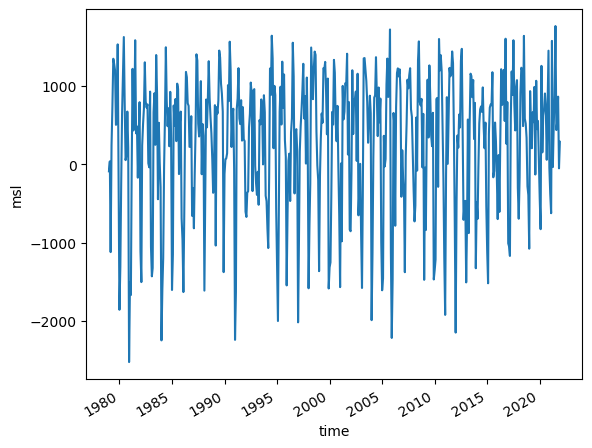

In [2]:
prs1 = field.sel(lon=namelist[telecname]['lon1'],lat=namelist['NAO']['lat1'])
prs2 = field.sel(lon=namelist[telecname]['lon2'],lat=namelist['NAO']['lat2'])

indx = prs1-prs2
indx.plot()

## DJF selection

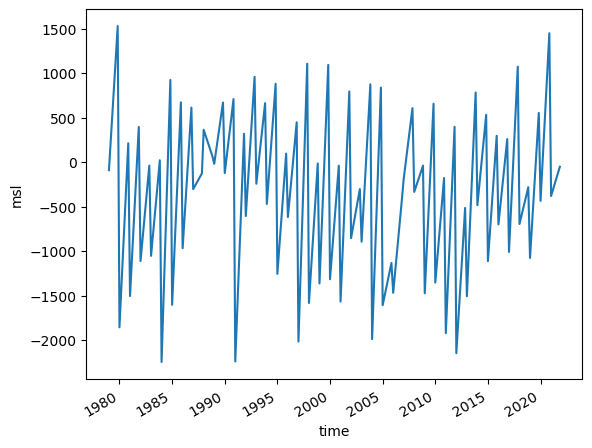

In [3]:
prs1_winter = prs1.sel(time=prs1.time.dt.month.isin([0, 1, 11]))
prs2_winter = prs2.sel(time=prs2.time.dt.month.isin([0, 1, 11]))
indx_winter = prs1_winter-prs2_winter
indx_winter.plot()

## Seasonal (3-month) average

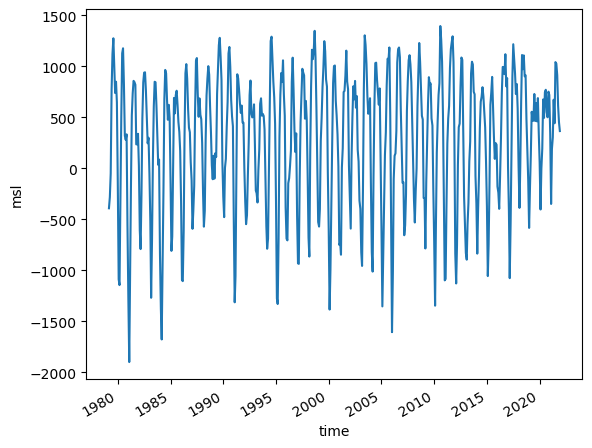

In [4]:
prs1_ma = prs1.rolling(time=3).mean()
prs2_ma = prs2.rolling(time=3).mean()

indx_ma = prs1_ma-prs2_ma
indx_ma.plot()

## Index evaluation

In [5]:
mean = indx_ma.mean()
std  = indx_ma.std()

indx_std = indx_ma/mean



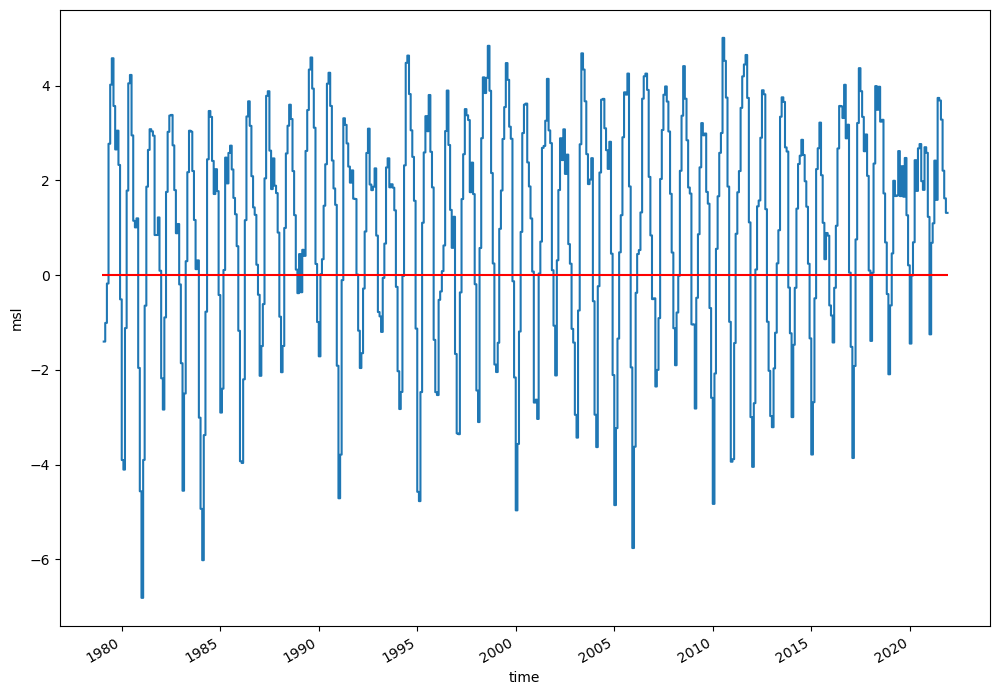

In [6]:
fig, ax = plt.subplots(figsize=(12, 8))

indx_std.plot(ax=ax,ds='steps')
ax.hlines(y=0,xmin=min(indx_std['time']),xmax=max(indx_std['time']),color='red')

### Tentative with formula

NAO = (P1 - av(P1))/std(P1) - (P2 - av(P2))/std(P2)

In [7]:
p1_mean = prs1_ma.mean()
p2_mean = prs2_ma.mean()

p1_std = prs1_ma.std()
p2_std = prs2_ma.std()

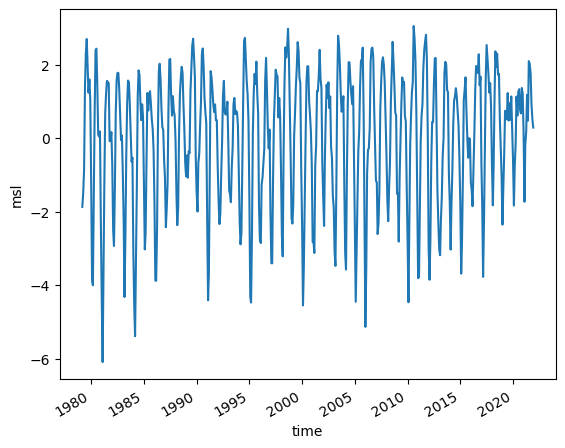

In [8]:
NAO = (prs1_ma-p1_mean)/p1_std - (prs2_ma-p2_mean)/p2_std
NAO.plot()

Alternative

NAO = ((P1 - P2) - av(P1 - P2))/std(P1 - P2)

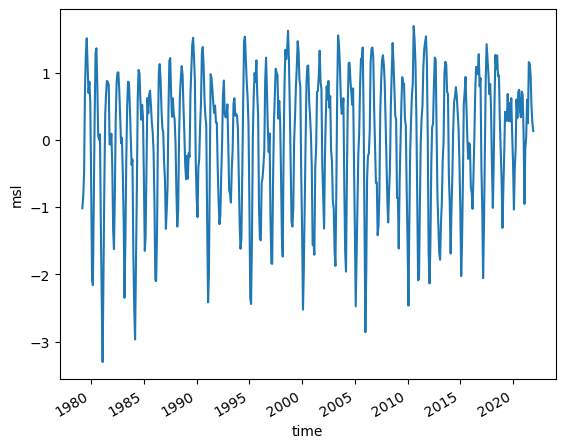

In [9]:
p12 = indx_ma
p12_mean = p12.mean()
p12_std = p12.std()

NAO2 = (p12 -p12_mean)/p12_std
NAO2.plot()

## Different time selection

In [10]:
prs1_tsel = prs1.sel(time=prs1.time.dt.year>2000)
prs2_tsel = prs2.sel(time=prs2.time.dt.year>2000)

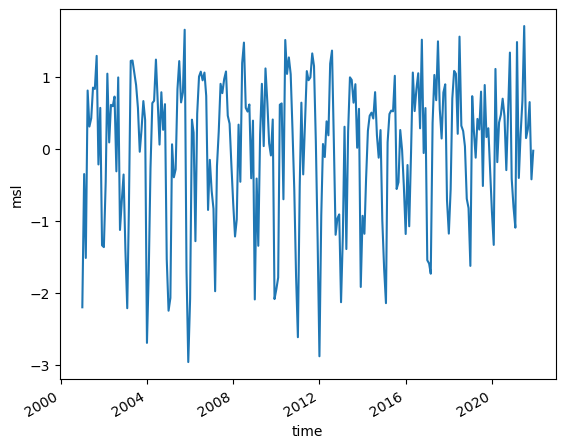

In [11]:
p12_tsel = prs1_tsel-prs2_tsel
p12_tsel_mean = p12_tsel.mean()
p12_tsel_std = p12_tsel.std()

NAO2_tsel = (p12_tsel -p12_tsel_mean)/p12_tsel_std
NAO2_tsel.plot()

## Save output to .nc database

In [19]:
outfile = config[diagname]['output']
filename = '/NAO_indx.nc'
outfile = outfile+filename

In [20]:
NAO2_tsel.to_netcdf(outfile)